In [1]:
import pandas as pd
from fastai.tabular import *

In [2]:
# Temp fix
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""


Dataset filename .csv decoding

e.g. **Faults_Cleaning_Counters_100_D_20_1.csv**

Field | Description
------|-----------------
Faults_Cleaning_Counters | what is in the datset
100 |  number of machines Serial Numbers in the datset. 
D | time period of summarization D=Days W=Weeks
10 | depth of each row in periods
1 | time periods between two consecutive rows for the same Serial Number

In [3]:
dataset_root = "Faults_Cleaning_Counters_100_D_20_1"

In [4]:
df = pd.concat([pd.read_csv(dataset_root+"_0000.csv",parse_dates = ['Target Timestamp']),
                pd.read_csv(dataset_root+"_0001.csv",parse_dates = ['Target Timestamp']),
                pd.read_csv(dataset_root+"_0002.csv",parse_dates = ['Target Timestamp']),
                pd.read_csv(dataset_root+"_0003.csv",parse_dates = ['Target Timestamp'])])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62300 entries, 0 to 15574
Columns: 605 entries, Unnamed: 0 to TARGET
dtypes: datetime64[ns](1), float64(601), int64(2), object(1)
memory usage: 288.0+ MB


In [6]:
categories_roots = list(set([s.split('-')[0] for s in df.columns if '-' in s]))
categories_roots

['ngr4',
 'tempogr1',
 'numcicligr1',
 'numvaporets',
 'portatagr4',
 'portatagr3',
 'numcaffegenerale',
 'portatagr1',
 'numcaffegr4',
 'FAULT',
 'tempogr2',
 'tempogr3',
 'numsolubile',
 'tempogr4',
 'numcaffegr1',
 'CLEANING',
 'ngr2',
 'numvaporeariats',
 'ngr1',
 'numcaffegr2',
 'numlattegr1',
 'portatagr2',
 'numlattefr',
 'numacqua',
 'numcaffegr3',
 'ngr3',
 'nummac2gr1',
 'numvapore',
 'nummac1gr1',
 'numcioccolato']

In [7]:
time_period=list(set([s.split('-')[1][-1] for s in df.columns if '-' in s]))[0]
time_period

'D'

In [8]:
target_width = 5

In [9]:
columns_to_sum = ['FAULT-%d%s'%(n,time_period) for n in range(target_width-1,0,-1)]
columns_to_sum.append('TARGET')
columns_to_sum

['FAULT-4D', 'FAULT-3D', 'FAULT-2D', 'FAULT-1D', 'TARGET']

In [10]:
from itertools import chain
columns_to_drop = [['%s-%d%s'%(root,n,time_period) for n in range(target_width-1,0,-1)] for root in categories_roots]
columns_to_drop = list(chain(*columns_to_drop))
columns_to_drop

['ngr4-4D',
 'ngr4-3D',
 'ngr4-2D',
 'ngr4-1D',
 'tempogr1-4D',
 'tempogr1-3D',
 'tempogr1-2D',
 'tempogr1-1D',
 'numcicligr1-4D',
 'numcicligr1-3D',
 'numcicligr1-2D',
 'numcicligr1-1D',
 'numvaporets-4D',
 'numvaporets-3D',
 'numvaporets-2D',
 'numvaporets-1D',
 'portatagr4-4D',
 'portatagr4-3D',
 'portatagr4-2D',
 'portatagr4-1D',
 'portatagr3-4D',
 'portatagr3-3D',
 'portatagr3-2D',
 'portatagr3-1D',
 'numcaffegenerale-4D',
 'numcaffegenerale-3D',
 'numcaffegenerale-2D',
 'numcaffegenerale-1D',
 'portatagr1-4D',
 'portatagr1-3D',
 'portatagr1-2D',
 'portatagr1-1D',
 'numcaffegr4-4D',
 'numcaffegr4-3D',
 'numcaffegr4-2D',
 'numcaffegr4-1D',
 'FAULT-4D',
 'FAULT-3D',
 'FAULT-2D',
 'FAULT-1D',
 'tempogr2-4D',
 'tempogr2-3D',
 'tempogr2-2D',
 'tempogr2-1D',
 'tempogr3-4D',
 'tempogr3-3D',
 'tempogr3-2D',
 'tempogr3-1D',
 'numsolubile-4D',
 'numsolubile-3D',
 'numsolubile-2D',
 'numsolubile-1D',
 'tempogr4-4D',
 'tempogr4-3D',
 'tempogr4-2D',
 'tempogr4-1D',
 'numcaffegr1-4D',
 'numcaff

In [11]:
df['TARGET']=df[columns_to_sum].sum(axis=1)
# For now only boolean prediction
df['TARGET'] = (df['TARGET']>0).astype(int)


In [12]:
df['TARGET'].value_counts()

0    40929
1    21371
Name: TARGET, dtype: int64

In [13]:
df.columns

Index(['Unnamed: 0', 'Serial', 'Model', 'Target Timestamp', 'CLEANING-20D',
       'CLEANING-19D', 'CLEANING-18D', 'CLEANING-17D', 'CLEANING-16D',
       'CLEANING-15D',
       ...
       'tempogr4-9D', 'tempogr4-8D', 'tempogr4-7D', 'tempogr4-6D',
       'tempogr4-5D', 'tempogr4-4D', 'tempogr4-3D', 'tempogr4-2D',
       'tempogr4-1D', 'TARGET'],
      dtype='object', length=605)

In [14]:
df['Target Timestamp'].min()
df['Target day'] = (df['Target Timestamp']-df['Target Timestamp'].min()).apply(lambda d: d.days)

In [15]:
columns_to_drop.extend(['Unnamed: 0','Target Timestamp','Serial'])
df = df.drop(columns_to_drop,axis=1)

In [16]:
df.columns

Index(['Model', 'CLEANING-20D', 'CLEANING-19D', 'CLEANING-18D', 'CLEANING-17D',
       'CLEANING-16D', 'CLEANING-15D', 'CLEANING-14D', 'CLEANING-13D',
       'CLEANING-12D',
       ...
       'tempogr4-12D', 'tempogr4-11D', 'tempogr4-10D', 'tempogr4-9D',
       'tempogr4-8D', 'tempogr4-7D', 'tempogr4-6D', 'tempogr4-5D', 'TARGET',
       'Target day'],
      dtype='object', length=483)

In [17]:
cont_names = list(df.columns)
cont_names.remove('Model')
cont_names.remove('TARGET')


In [18]:
dep_var = 'TARGET'
cat_names = ['Model']
procs = [FillMissing, Categorify, Normalize]

In [19]:
train_test_ratio = .25

In [20]:
last_sample = len(df)
first_test = int(last_sample*(1 - train_test_ratio))
first_test,last_sample

(46725, 62300)

In [21]:
test = TabularList.from_df(df.iloc[first_test:last_sample].copy(), cat_names=cat_names,cont_names=cont_names)
data = (TabularList.from_df(df, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(first_test,last_sample)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [22]:
data.show_batch(rows=10)

Model,CLEANING-20D,CLEANING-19D,CLEANING-18D,CLEANING-17D,CLEANING-16D,CLEANING-15D,CLEANING-14D,CLEANING-13D,CLEANING-12D,CLEANING-11D,CLEANING-10D,CLEANING-9D,CLEANING-8D,CLEANING-7D,CLEANING-6D,CLEANING-5D,FAULT-20D,FAULT-19D,FAULT-18D,FAULT-17D,FAULT-16D,FAULT-15D,FAULT-14D,FAULT-13D,FAULT-12D,FAULT-11D,FAULT-10D,FAULT-9D,FAULT-8D,FAULT-7D,FAULT-6D,FAULT-5D,ngr1-20D,ngr1-19D,ngr1-18D,ngr1-17D,ngr1-16D,ngr1-15D,ngr1-14D,ngr1-13D,ngr1-12D,ngr1-11D,ngr1-10D,ngr1-9D,ngr1-8D,ngr1-7D,ngr1-6D,ngr1-5D,ngr2-20D,ngr2-19D,ngr2-18D,ngr2-17D,ngr2-16D,ngr2-15D,ngr2-14D,ngr2-13D,ngr2-12D,ngr2-11D,ngr2-10D,ngr2-9D,ngr2-8D,ngr2-7D,ngr2-6D,ngr2-5D,ngr3-20D,ngr3-19D,ngr3-18D,ngr3-17D,ngr3-16D,ngr3-15D,ngr3-14D,ngr3-13D,ngr3-12D,ngr3-11D,ngr3-10D,ngr3-9D,ngr3-8D,ngr3-7D,ngr3-6D,ngr3-5D,ngr4-20D,ngr4-19D,ngr4-18D,ngr4-17D,ngr4-16D,ngr4-15D,ngr4-14D,ngr4-13D,ngr4-12D,ngr4-11D,ngr4-10D,ngr4-9D,ngr4-8D,ngr4-7D,ngr4-6D,ngr4-5D,numacqua-20D,numacqua-19D,numacqua-18D,numacqua-17D,numacqua-16D,numacqua-15D,numacqua-14D,numacqua-13D,numacqua-12D,numacqua-11D,numacqua-10D,numacqua-9D,numacqua-8D,numacqua-7D,numacqua-6D,numacqua-5D,numcaffegenerale-20D,numcaffegenerale-19D,numcaffegenerale-18D,numcaffegenerale-17D,numcaffegenerale-16D,numcaffegenerale-15D,numcaffegenerale-14D,numcaffegenerale-13D,numcaffegenerale-12D,numcaffegenerale-11D,numcaffegenerale-10D,numcaffegenerale-9D,numcaffegenerale-8D,numcaffegenerale-7D,numcaffegenerale-6D,numcaffegenerale-5D,numcaffegr1-20D,numcaffegr1-19D,numcaffegr1-18D,numcaffegr1-17D,numcaffegr1-16D,numcaffegr1-15D,numcaffegr1-14D,numcaffegr1-13D,numcaffegr1-12D,numcaffegr1-11D,numcaffegr1-10D,numcaffegr1-9D,numcaffegr1-8D,numcaffegr1-7D,numcaffegr1-6D,numcaffegr1-5D,numcaffegr2-20D,numcaffegr2-19D,numcaffegr2-18D,numcaffegr2-17D,numcaffegr2-16D,numcaffegr2-15D,numcaffegr2-14D,numcaffegr2-13D,numcaffegr2-12D,numcaffegr2-11D,numcaffegr2-10D,numcaffegr2-9D,numcaffegr2-8D,numcaffegr2-7D,numcaffegr2-6D,numcaffegr2-5D,numcaffegr3-20D,numcaffegr3-19D,numcaffegr3-18D,numcaffegr3-17D,numcaffegr3-16D,numcaffegr3-15D,numcaffegr3-14D,numcaffegr3-13D,numcaffegr3-12D,numcaffegr3-11D,numcaffegr3-10D,numcaffegr3-9D,numcaffegr3-8D,numcaffegr3-7D,numcaffegr3-6D,numcaffegr3-5D,numcaffegr4-20D,numcaffegr4-19D,numcaffegr4-18D,numcaffegr4-17D,numcaffegr4-16D,numcaffegr4-15D,numcaffegr4-14D,numcaffegr4-13D,numcaffegr4-12D,numcaffegr4-11D,numcaffegr4-10D,numcaffegr4-9D,numcaffegr4-8D,numcaffegr4-7D,numcaffegr4-6D,numcaffegr4-5D,numcicligr1-20D,numcicligr1-19D,numcicligr1-18D,numcicligr1-17D,numcicligr1-16D,numcicligr1-15D,numcicligr1-14D,numcicligr1-13D,numcicligr1-12D,numcicligr1-11D,numcicligr1-10D,numcicligr1-9D,numcicligr1-8D,numcicligr1-7D,numcicligr1-6D,numcicligr1-5D,numcioccolato-20D,numcioccolato-19D,numcioccolato-18D,numcioccolato-17D,numcioccolato-16D,numcioccolato-15D,numcioccolato-14D,numcioccolato-13D,numcioccolato-12D,numcioccolato-11D,numcioccolato-10D,numcioccolato-9D,numcioccolato-8D,numcioccolato-7D,numcioccolato-6D,numcioccolato-5D,numlattefr-20D,numlattefr-19D,numlattefr-18D,numlattefr-17D,numlattefr-16D,numlattefr-15D,numlattefr-14D,numlattefr-13D,numlattefr-12D,numlattefr-11D,numlattefr-10D,numlattefr-9D,numlattefr-8D,numlattefr-7D,numlattefr-6D,numlattefr-5D,numlattegr1-20D,numlattegr1-19D,numlattegr1-18D,numlattegr1-17D,numlattegr1-16D,numlattegr1-15D,numlattegr1-14D,numlattegr1-13D,numlattegr1-12D,numlattegr1-11D,numlattegr1-10D,numlattegr1-9D,numlattegr1-8D,numlattegr1-7D,numlattegr1-6D,numlattegr1-5D,nummac1gr1-20D,nummac1gr1-19D,nummac1gr1-18D,nummac1gr1-17D,nummac1gr1-16D,nummac1gr1-15D,nummac1gr1-14D,nummac1gr1-13D,nummac1gr1-12D,nummac1gr1-11D,nummac1gr1-10D,nummac1gr1-9D,nummac1gr1-8D,nummac1gr1-7D,nummac1gr1-6D,nummac1gr1-5D,nummac2gr1-20D,nummac2gr1-19D,nummac2gr1-18D,nummac2gr1-17D,nummac2gr1-16D,nummac2gr1-15D,nummac2gr1-14D,nummac2gr1-13D,nummac2gr1-12D,nummac2gr1-11D,nummac2gr1-10D,nummac2gr1-9D,nummac2gr1-8D,nummac2gr1-7D,nummac2gr1-6D,nummac2gr1-5D,numsolubile-20D,numsolubile-19D,numsolubile-18D,nums

In [94]:
torch.manual_seed(7)



In [95]:
learn = tabular_learner(data, layers=[1000,500,500,200], metrics=accuracy,wd=0.05)

In [96]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.276475,4.515220,0.709278


In [97]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


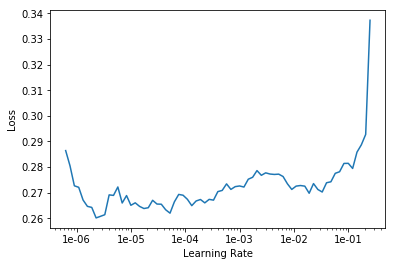

In [98]:
learn.recorder.plot()


In [101]:
learn.fit(3, 1e-2)


epoch,train_loss,valid_loss,accuracy
1,0.265744,4097.694824,0.597303
2,0.273558,2425.409668,0.556148
3,0.267608,2100.761230,0.551332


In [80]:
#learn.save(dataset_root + '_acc_07142.learner')

### Utility - split the datset

In [26]:
#
# Split the dataset in smaller chunks to allow upload to gisthub
#
df = pd.read_csv("Faults_Cleaning_Counters_100_D_20_1.csv",parse_dates = ['Target Timestamp'])
n = 4
split = len(df)/n
name = "Faults_Cleaning_Counters_100_D_20_1.csv"

for i,start_idx in enumerate(range(0,l,int(len(df)/n))):
    stop_idx = min(start_idx+int(len(df)/n),len(df))
    print(start_idx,stop_idx)
    file = "%s_%04d.csv"%(name.split('.')[0],i)
    print(file)
    df.iloc[start_idx:stop_idx].to_csv(file)

0 15575
Faults_Cleaning_Counters_100_D_20_1_0000.csv
15575 31150
Faults_Cleaning_Counters_100_D_20_1_0001.csv
31150 46725
Faults_Cleaning_Counters_100_D_20_1_0002.csv
46725 62300
Faults_Cleaning_Counters_100_D_20_1_0003.csv
